# Question: Output variable -> y
# y -> Whether the client has subscribed a term deposit or not 
# Binomial ("yes" or "no")

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [4]:
#load the data set
bank=pd.read_csv("bank-full.csv",sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [44]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
for column in bank.columns:
        if bank[column].dtype == np.number:
            continue
        bank[column] = LabelEncoder().fit_transform(bank[column])
bank

C:\Users\shash\AppData\Local\Temp\ipykernel_11584\1583159273.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if bank[column].dtype == np.number:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [8]:
# shape of the dataset
bank.shape

(45211, 17)

In [9]:
#removing NA values 
bank=bank.dropna()
bank.shape

(45211, 17)

In [59]:
bank.shape[0]

45211

In [72]:
# Dividing our data into input and output variables
X=bank.iloc[:,0:16]
Y=bank.iloc[:,16]

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [73]:
#Logistic Regression and fit the model
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
# predict the X dataset
y_pred= classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
data={'actual':np.array(Y),'pred_prob':y_pred}

In [76]:
y_pred_df= pd.DataFrame(data)
y_pred_df

,actual,pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [77]:
#Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[38988   934]
 [ 4250  1039]]


In [78]:
((39988+1039)/(38988+934+4250+1039))*100

90.74561500519785

In [79]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.53      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.71      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

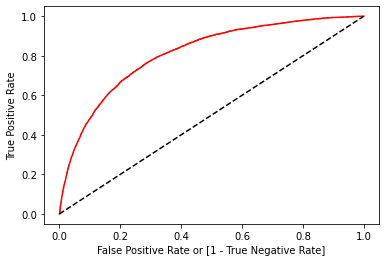

In [90]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
fpr, tpr, thresholds= roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [81]:
auc

0.5865249156823853